In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display, HTML
import openpyxl

In [9]:
plt.style.use('fivethirtyeight')
sns.set_palette("viridis")
sns.set_context("notebook", font_scale=1.2)

In [13]:
file_path = '/home/brishti/sportsanalysis/Sports Analysis dataset.xlsx'
data = pd.read_excel(file_path, sheet_name=2)
data_as_lists = data.values.tolist()
headers = data.columns.tolist()
#print("Headers:", headers)
#print("First few rows:", data_as_lists[:3])  

In [21]:
data.columns = ['opening_name', 'times_played', 'white_wins', 'black_wins', 'draws']

In [25]:
print(f"Total unique openings: {len(df)}")
print(f"Total white wins: {df['white_wins'].sum()}")
print(f"Total black wins: {df['black_wins'].sum()}")
print(f"Total draws: {df['draws'].sum()}")

Total unique openings: 407
Total white wins: 8337
Total black wins: 7681
Total draws: 765


In [26]:
df['white_win_rate'] = df['white_wins'] / df['times_played'] * 100
df['black_win_rate'] = df['black_wins'] / df['times_played'] * 100
df['draw_rate'] = df['draws'] / df['times_played'] * 100
df['color_advantage'] = df['white_win_rate'] - df['black_win_rate'] 

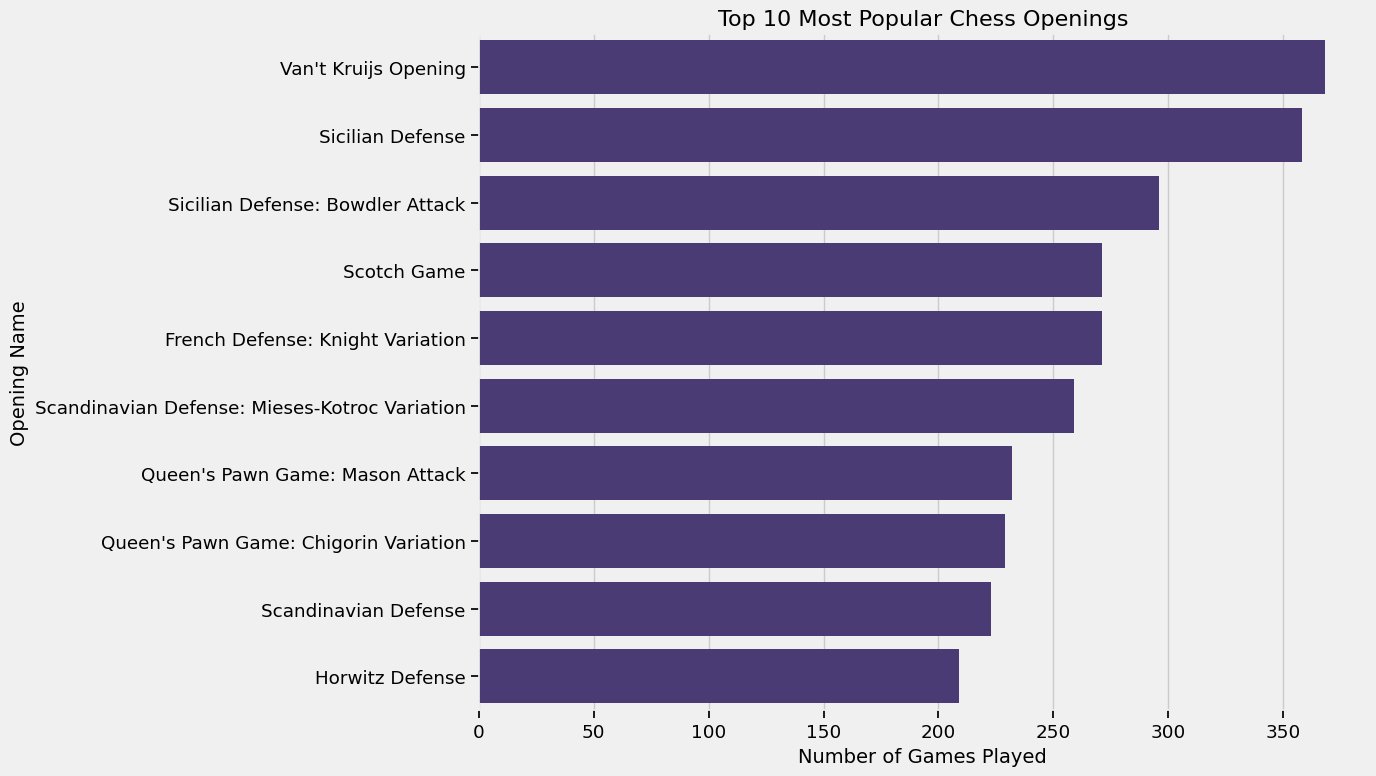

In [27]:
# Top 10 most played openings
plt.figure(figsize=(14, 8))
top_popular = df.sort_values('times_played', ascending=False).head(10)
sns.barplot(x='times_played', y='opening_name', data=top_popular)
plt.title('Top 10 Most Popular Chess Openings', fontsize=16)
plt.xlabel('Number of Games Played', fontsize=14)
plt.ylabel('Opening Name', fontsize=14)
plt.tight_layout()
plt.show()

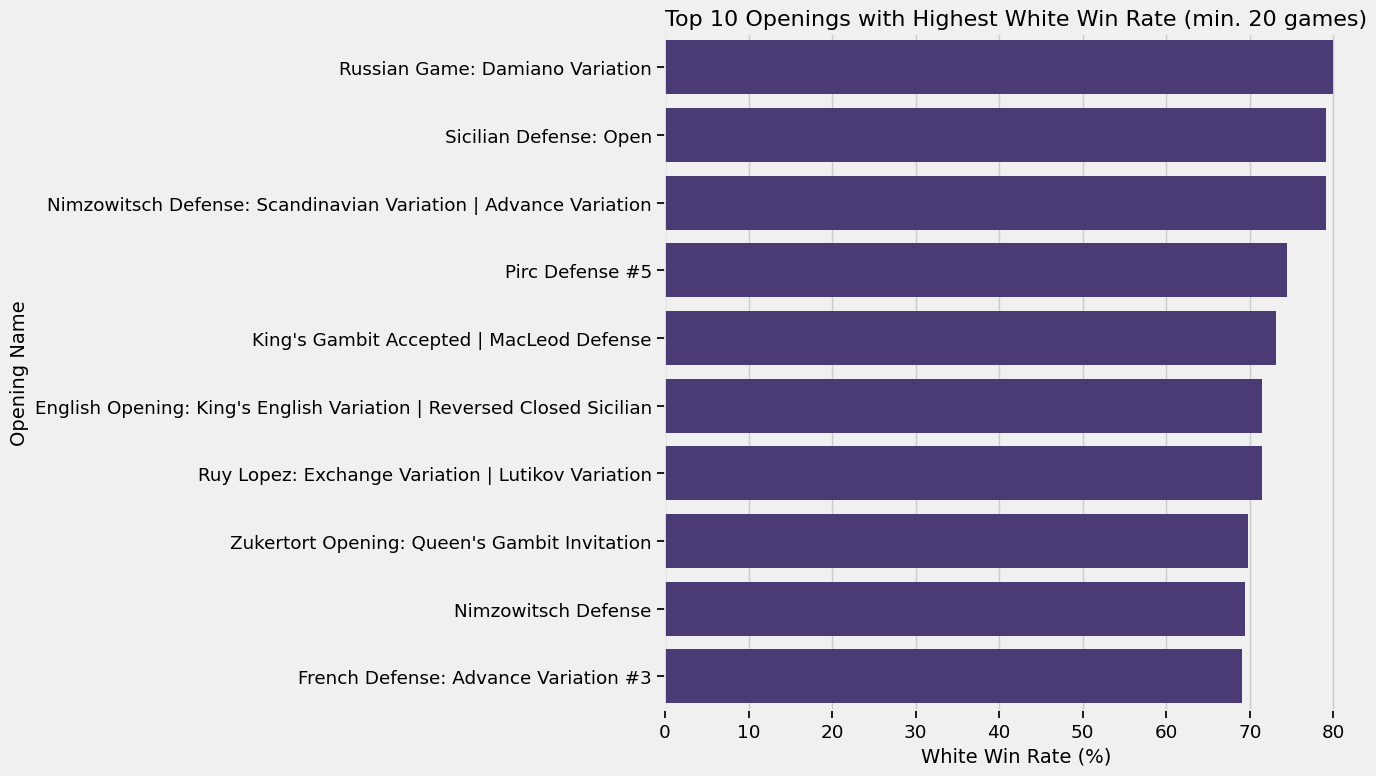

In [28]:
plt.figure(figsize=(14, 8))
high_white_win = df[df['times_played'] >= 20].sort_values('white_win_rate', ascending=False).head(10)
sns.barplot(x='white_win_rate', y='opening_name', data=high_white_win)
plt.title('Top 10 Openings with Highest White Win Rate (min. 20 games)', fontsize=16)
plt.xlabel('White Win Rate (%)', fontsize=14)
plt.ylabel('Opening Name', fontsize=14)
plt.tight_layout()
plt.show()

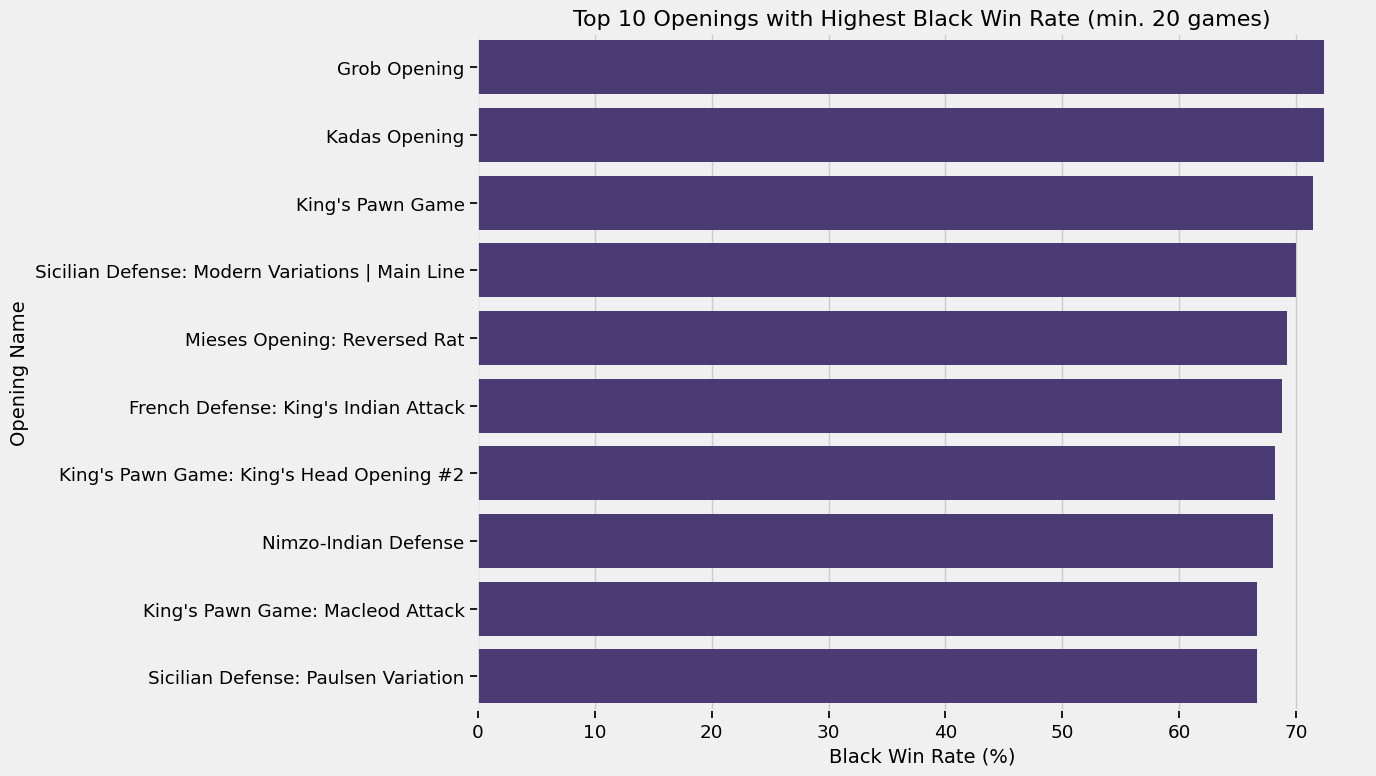

In [29]:
plt.figure(figsize=(14, 8))
high_black_win = df[df['times_played'] >= 20].sort_values('black_win_rate', ascending=False).head(10)
sns.barplot(x='black_win_rate', y='opening_name', data=high_black_win)
plt.title('Top 10 Openings with Highest Black Win Rate (min. 20 games)', fontsize=16)
plt.xlabel('Black Win Rate (%)', fontsize=14)
plt.ylabel('Opening Name', fontsize=14)
plt.tight_layout()
plt.show()

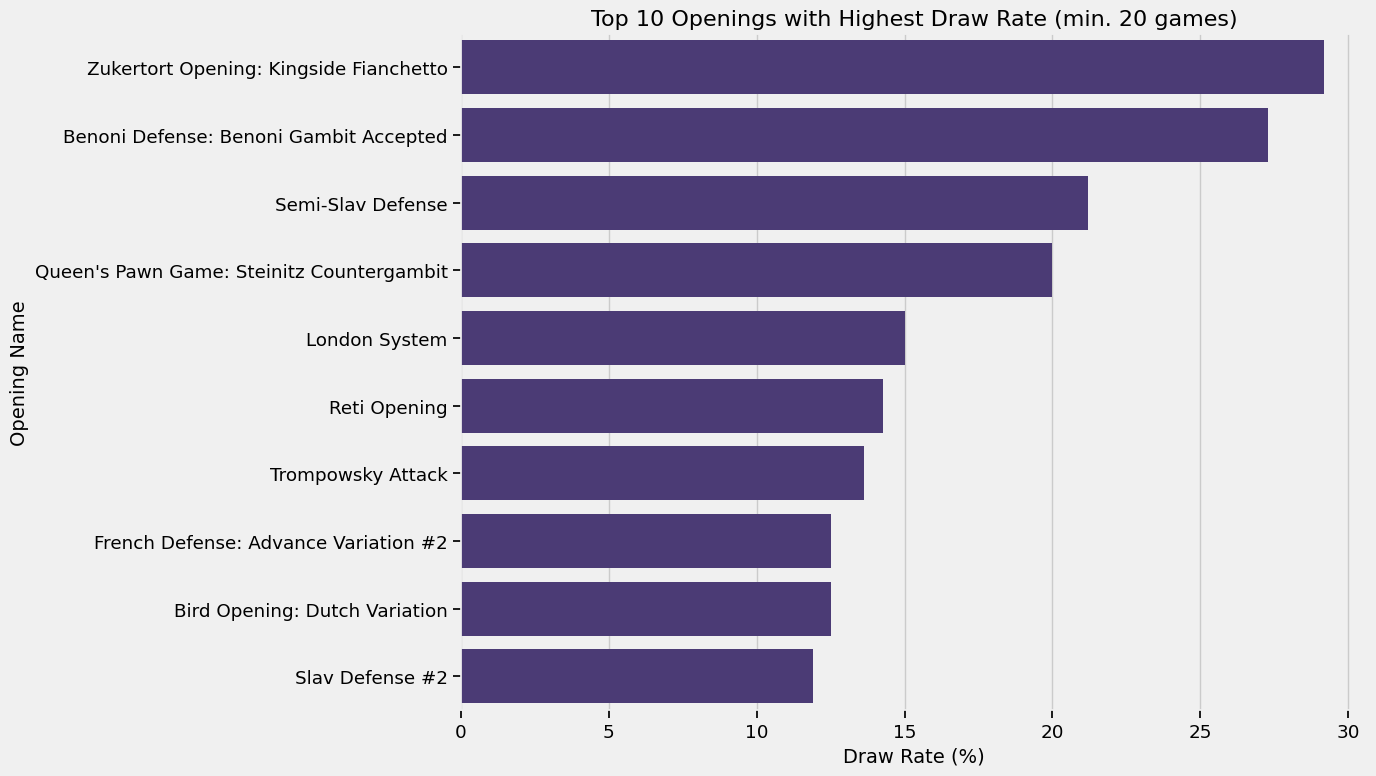

In [30]:
plt.figure(figsize=(14, 8))
high_draw = df[df['times_played'] >= 20].sort_values('draw_rate', ascending=False).head(10)
sns.barplot(x='draw_rate', y='opening_name', data=high_draw)
plt.title('Top 10 Openings with Highest Draw Rate (min. 20 games)', fontsize=16)
plt.xlabel('Draw Rate (%)', fontsize=14)
plt.ylabel('Opening Name', fontsize=14)
plt.tight_layout()
plt.show()

In [32]:
fig = px.bar(top_popular, x='times_played', y='opening_name', 
             title='Top 10 Most Popular Chess Openings',
             labels={'times_played': 'Number of Games Played', 'opening_name': 'Opening Name'},
             color='times_played', 
             hover_data=['white_win_rate', 'black_win_rate', 'draw_rate'])
fig.update_layout(height=600, width=900)
fig.show()

In [33]:
fig = px.scatter(df, x='times_played', y='white_win_rate',
                 size='times_played', color='black_win_rate',
                 hover_name='opening_name',
                 labels={'times_played': 'Number of Games Played', 
                         'white_win_rate': 'White Win Rate (%)',
                         'black_win_rate': 'Black Win Rate (%)'},
                 title='Chess Openings: Popularity vs. Win Rates')

fig.update_layout(height=700, width=1000, 
                  xaxis=dict(type='log'),  # Log scale for better visualization
                  hovermode='closest')
fig.show()

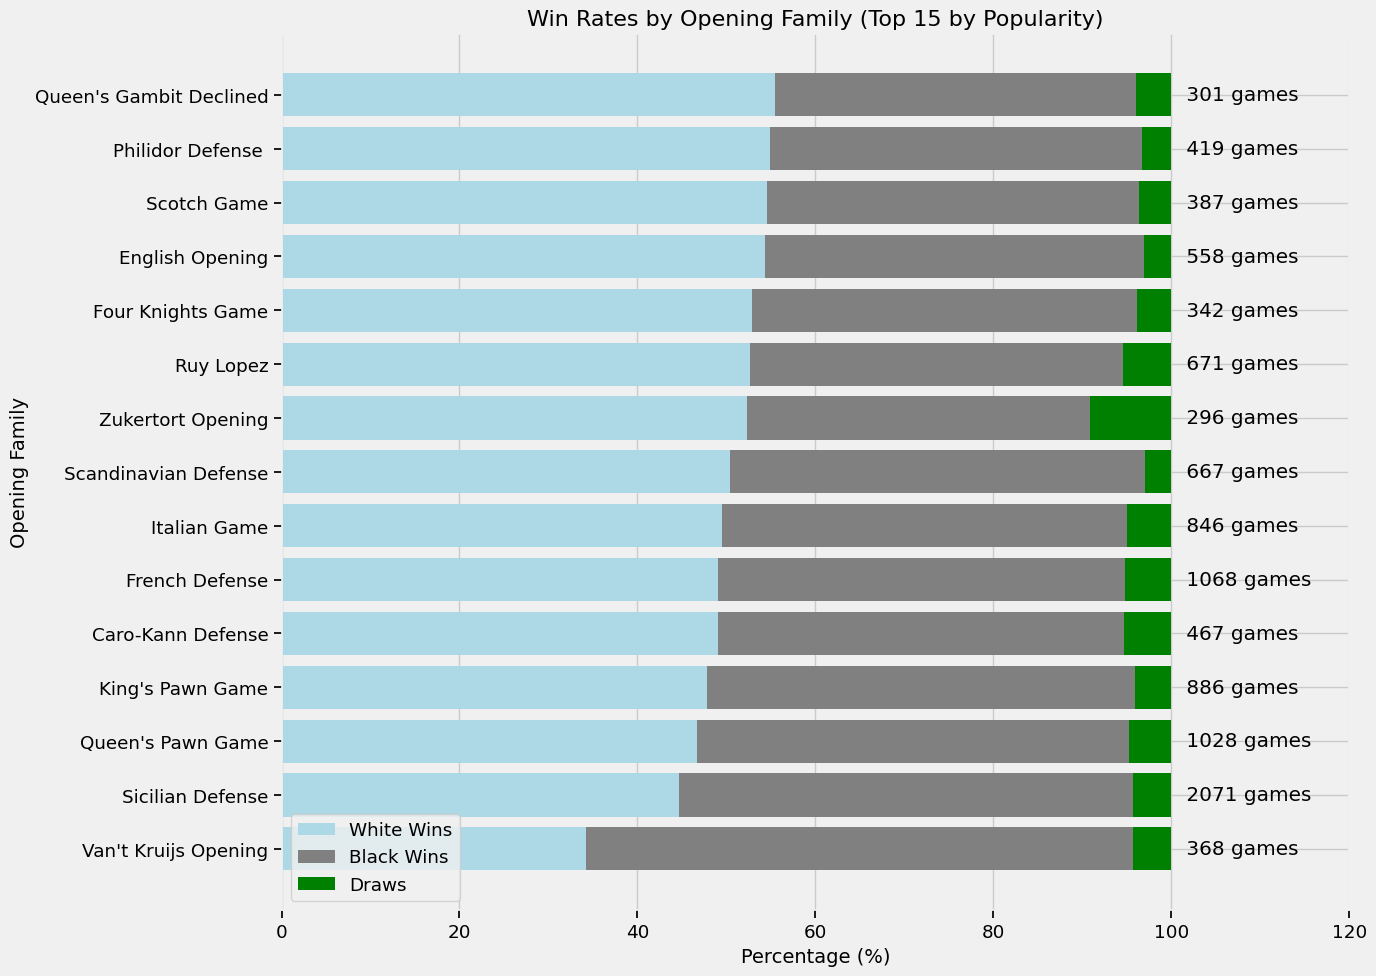

In [36]:
df['opening_family'] = df['opening_name'].str.split(':').str[0]
df['opening_family'] = df['opening_family'].str.split('#').str[0]  # Remove number indicators

# Analyze opening families
family_stats = df.groupby('opening_family').agg({
    'times_played': 'sum',
    'white_wins': 'sum',
    'black_wins': 'sum',
    'draws': 'sum'
}).reset_index()

family_stats['white_win_rate'] = family_stats['white_wins'] / family_stats['times_played'] * 100
family_stats['black_win_rate'] = family_stats['black_wins'] / family_stats['times_played'] * 100
family_stats['draw_rate'] = family_stats['draws'] / family_stats['times_played'] * 100
family_stats['color_advantage'] = family_stats['white_win_rate'] - family_stats['black_win_rate']

# Display top families by popularity
top_families = family_stats.sort_values('times_played', ascending=False).head(15)

# Create a stacked bar chart of win rates by opening family
plt.figure(figsize=(14, 10))
top_families_sorted = top_families.sort_values('white_win_rate')

# Create the stacked bars
white_bars = plt.barh(top_families_sorted['opening_family'], top_families_sorted['white_win_rate'], 
                       color='lightblue', label='White Wins')
black_bars = plt.barh(top_families_sorted['opening_family'], top_families_sorted['black_win_rate'], 
                       left=top_families_sorted['white_win_rate'], color='gray', label='Black Wins')
draw_bars = plt.barh(top_families_sorted['opening_family'], top_families_sorted['draw_rate'],
                      left=top_families_sorted['white_win_rate'] + top_families_sorted['black_win_rate'], 
                      color='green', label='Draws')

plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Opening Family', fontsize=14)
plt.title('Win Rates by Opening Family (Top 15 by Popularity)', fontsize=16)
plt.legend(loc='lower left')

# Add game count as text on the right
for i, family in enumerate(top_families_sorted['opening_family']):
    games = top_families_sorted[top_families_sorted['opening_family']==family]['times_played'].values[0]
    plt.text(101, i, f" {games} games", va='center')

plt.xlim(0, 120)  # Make space for the annotation
plt.tight_layout()
plt.show()

Overall White Win Rate: 49.68%
Overall Black Win Rate: 45.77%
Overall Draw Rate: 4.56%


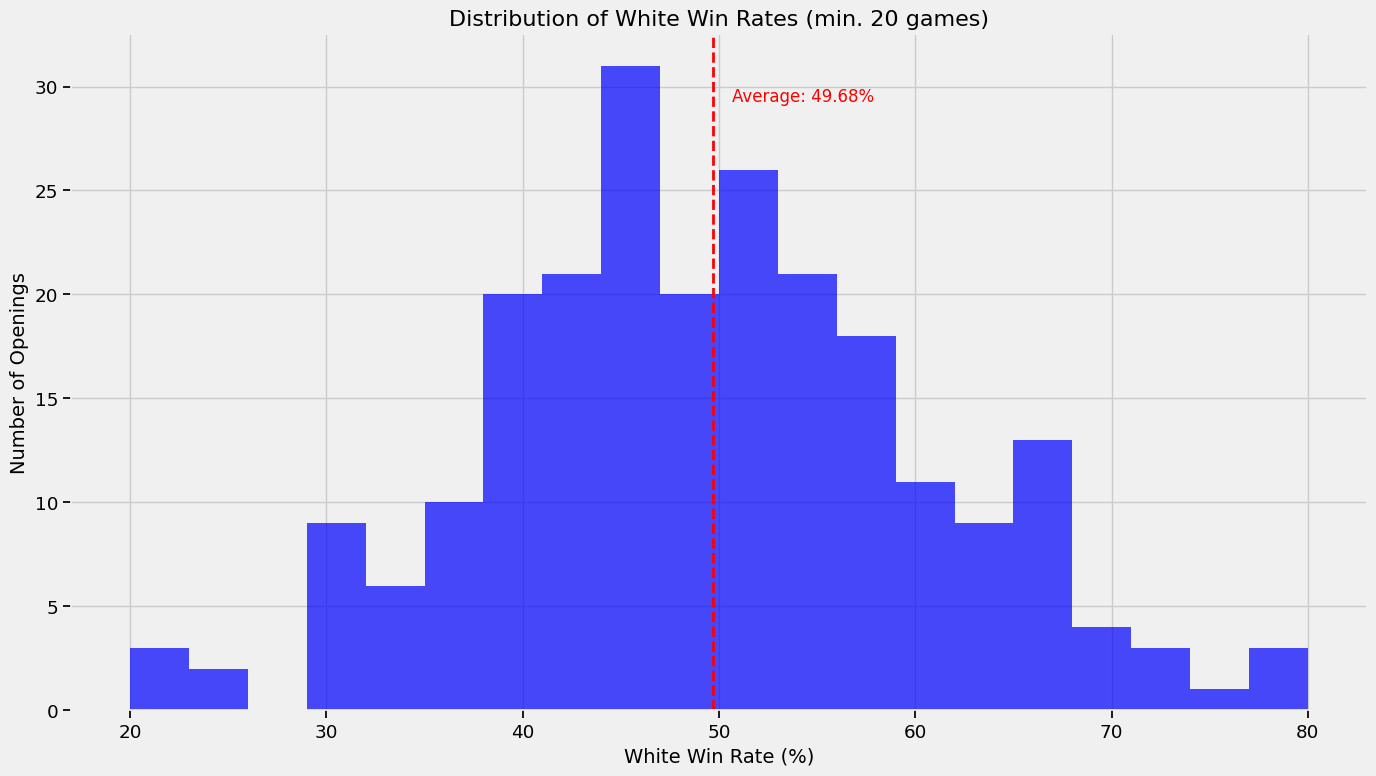

In [37]:
overall_white_win_rate = df['white_wins'].sum() / df['times_played'].sum() * 100
overall_black_win_rate = df['black_wins'].sum() / df['times_played'].sum() * 100
overall_draw_rate = df['draws'].sum() / df['times_played'].sum() * 100

print(f"Overall White Win Rate: {overall_white_win_rate:.2f}%")
print(f"Overall Black Win Rate: {overall_black_win_rate:.2f}%")
print(f"Overall Draw Rate: {overall_draw_rate:.2f}%")

# Distribution of white win rates
plt.figure(figsize=(14, 8))
plt.hist(df[df['times_played'] >= 20]['white_win_rate'], bins=20, alpha=0.7, color='blue')
plt.axvline(overall_white_win_rate, color='red', linestyle='dashed', linewidth=2)
plt.text(overall_white_win_rate + 1, plt.ylim()[1]*0.9, f'Average: {overall_white_win_rate:.2f}%', 
         color='red', fontsize=12)
plt.title('Distribution of White Win Rates (min. 20 games)', fontsize=16)
plt.xlabel('White Win Rate (%)', fontsize=14)
plt.ylabel('Number of Openings', fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipykernel_5137/927214883.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




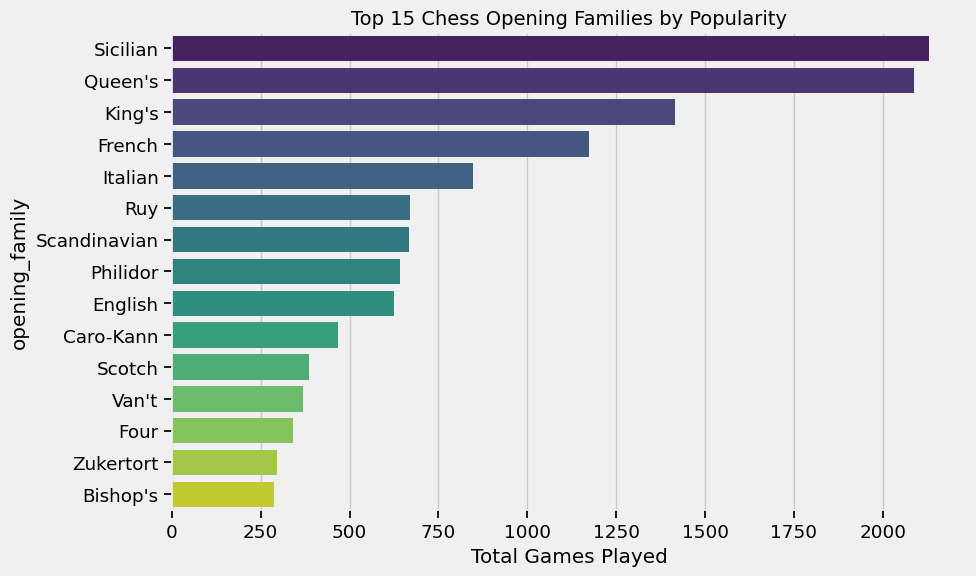

In [49]:
# Bar plot of opening families
top_families = family_counts.head(15)  # show top 15 families

plt.figure(figsize=(10, 6))
sns.barplot(x=top_families.values, y=top_families.index, palette='viridis')
plt.xlabel('Total Games Played')
plt.title('Top 15 Chess Opening Families by Popularity', fontsize=14)
plt.tight_layout()
plt.show()